In [1]:
#import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

%matplotlib inline

In [2]:
n = 600

# MA(1)
ar = np.r_[1, 0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)

In [3]:
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

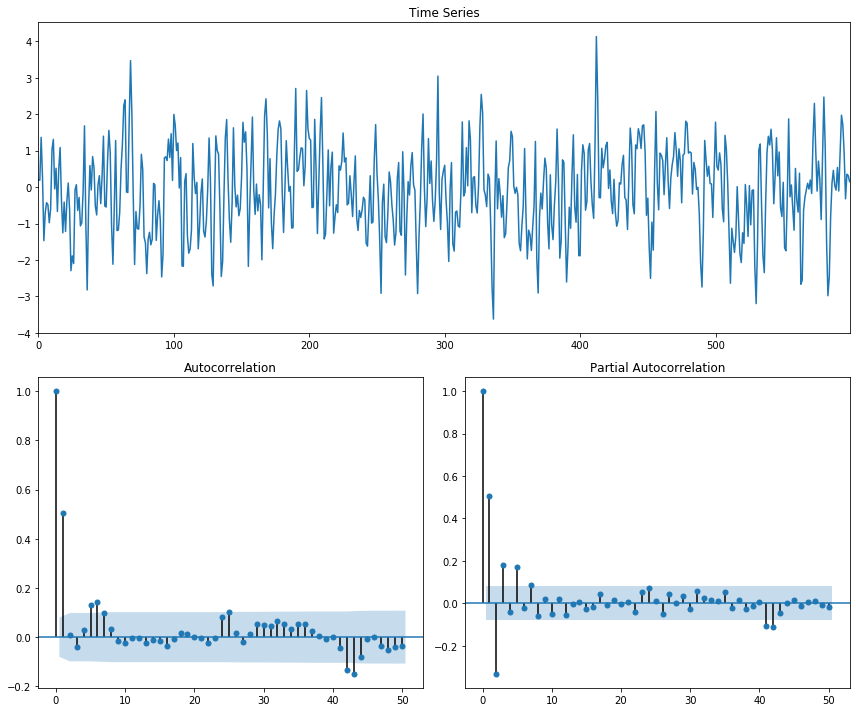

In [4]:
plotds(ma1_data)

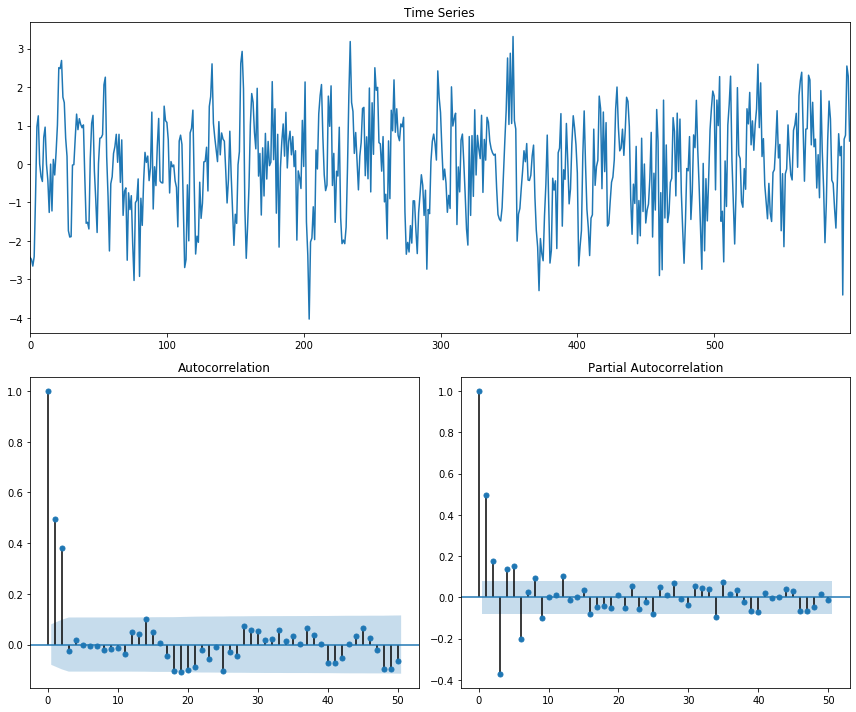

In [5]:
# MA(2)
ar = np.r_[1, 0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ma2_data)

In [6]:
ma1 = smtsa.ARMA(ma1_data.tolist(), order=(0, 1))\
           .fit(maxlag=30, method='mle', trend='nc')
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 1)   Log Likelihood                -811.133
Method:                           mle   S.D. of innovations              0.935
Date:                Fri, 24 Jan 2020   AIC                           1626.266
Time:                        08:20:16   BIC                           1635.060
Sample:                             0   HQIC                          1629.690
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.7418      0.028     26.468      0.000       0.687       0.797
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.3481           +0.0000j            1.3481            0.5000
-----------------------------------------------------------------------------
"""

In [7]:
ma2 = smtsa.ARMA(ma2_data.tolist(), order=(0, 2))\
           .fit(maxlag=30, method='mle', trend='nc')
ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 2)   Log Likelihood                -838.169
Method:                           mle   S.D. of innovations              0.977
Date:                Fri, 24 Jan 2020   AIC                           1682.338
Time:                        08:20:16   BIC                           1695.529
Sample:                             0   HQIC                          1687.473
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.5586      0.031     18.046      0.000       0.498       0.619
ma.L2.y        0.6725      0.029     23.337      0.000       0.616       0.729
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.4153           -1.1465j            1.2194           -0.3053
MA.2           -0.4153           +1.1465j            1.2194            0.3053
-----------------------------------------------------------------------------
"""

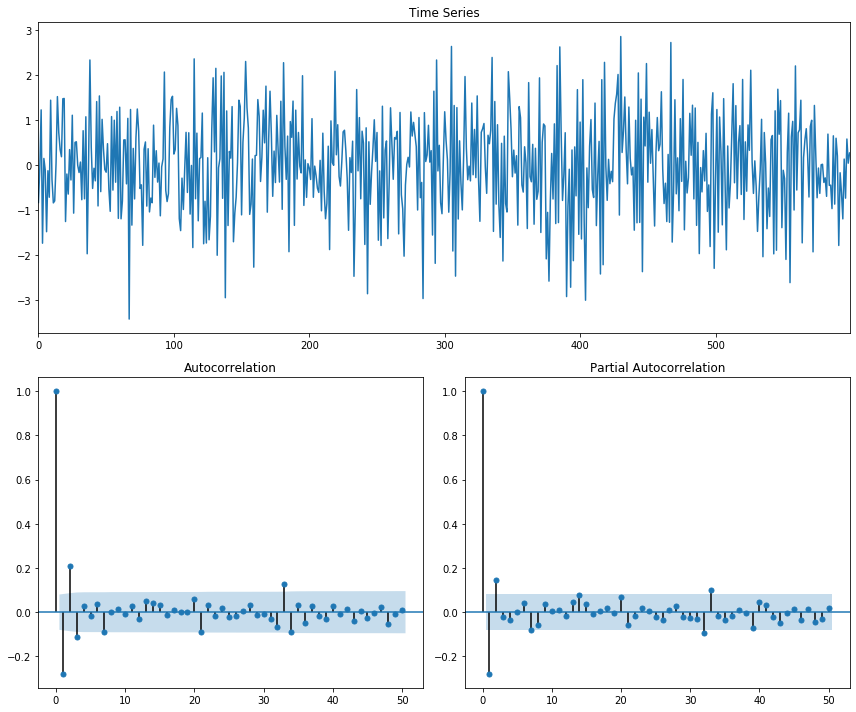

In [8]:
n = 600 
ar = np.r_[1, 0.6] 
ma = np.r_[1, 0.3] 
ar1ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)  
plotds(ar1ma1_data ) 

In [9]:
# ARMA(1, 1) mod
ar1ma1 = smtsa.ARMA(ar1ma1_data.tolist(), order=(1, 1))\
    .fit(maxlag=30, method='mle', trend='nc')
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 1)   Log Likelihood                -888.382
Method:                           mle   S.D. of innovations              1.064
Date:                Fri, 24 Jan 2020   AIC                           1782.763
Time:                        08:20:17   BIC                           1795.954
Sample:                             0   HQIC                          1787.898
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6362      0.087     -7.329      0.000      -0.806      -0.466
ma.L1.y        0.3880      0.103      3.785      0.000       0.187       0.589
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5718           +0.0000j            1.5718            0.5000
MA.1           -2.5772           +0.0000j            2.5772            0.5000
-----------------------------------------------------------------------------
"""

In [10]:
# optimize ARMA params
aic_val = []
for ar in range(1, 3):
    for ma in range(1, 3):
        arma_obj = smtsa.ARMA(ar1ma1_data.tolist(), order=(ar, ma))\
            .fit(maxlag=30, method='mle', trend='nc')
        aic_val.append([ar, ma, arma_obj.aic])

In [11]:
pd.DataFrame(aic_val, columns=['AR', 'MA', 'AIC'])

,AR,MA,AIC
0,1,1,1782.763344
1,1,2,1782.631282
2,2,1,1783.110779
3,2,2,1784.174640


In [12]:
DATA = '../../../data'

ibm = pd.read_csv(f'{DATA}/IBM.csv')
ibm = ibm[['Date', 'Adj Close']]
ibm.rename(columns={'Adj Close': 'Close'}, inplace=True)
ibm.head()

,Date,Close
0,2001-01-02,56.790684
1,2001-01-03,63.361145
2,2001-01-04,62.398586
3,2001-01-05,62.942654
4,2001-01-08,62.649712


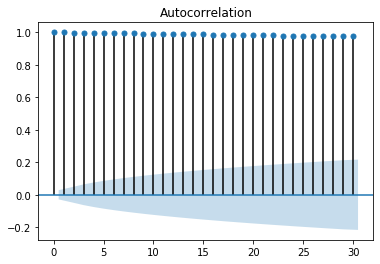

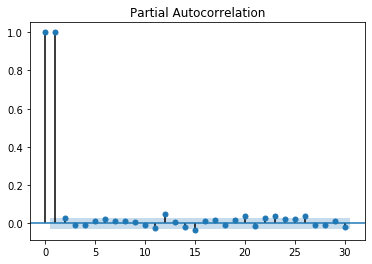

In [13]:
ibm['resid'] = ibm.Close - ibm.Close.mean()
ibm.dropna(inplace=True)

plot_acf(ibm.resid, lags=30);
plot_pacf(ibm.resid, lags=30);

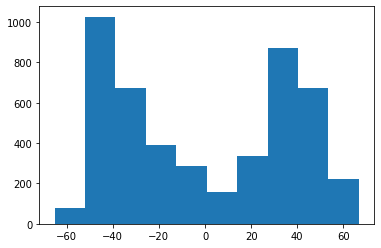

In [14]:
plt.hist(ibm.resid);

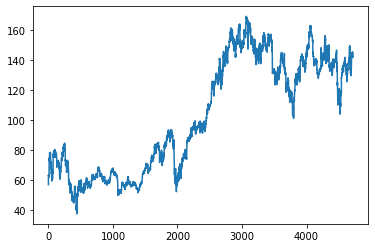

In [21]:
plt.plot(ibm.Close);

In [22]:
# Cannot use with full array: data not stationary

aic_val = []
for ar in range(1, 3):
    for ma in range(0, 3):
        arma_obj = smtsa.ARMA(ibm.Close[3000:].tolist(), order=(ar, ma))\
            .fit(maxlag=30, method='mle', trend='nc')
        aic_val.append([ar, ma, arma_obj.aic])

In [25]:
pd.DataFrame(aic_val, columns=['AR', 'MA', 'AIC']).sort_values('AIC')

,AR,MA,AIC
0,1,0,6732.864529
1,1,1,6734.862635
3,2,0,6734.862720
4,2,1,6735.478725
2,1,2,6735.950219
5,2,2,6736.388620


In [28]:
arma_obj_fin = smtsa.ARMA(ibm.Close.tolist(), order=(1, 0))\
    .fit(maxlag=30, method='mle', trend='nc')
ibm['ARMA'] = arma_obj_fin.predict()

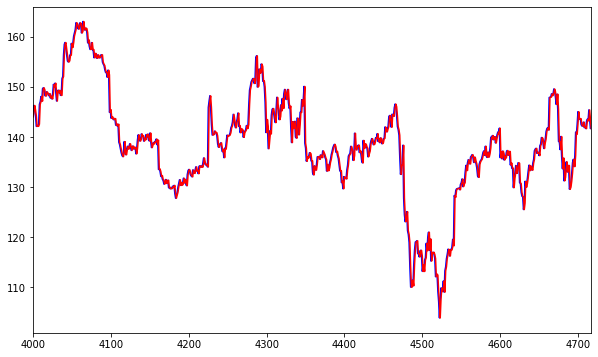

In [34]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(10, 6)
ibm.Close.iloc[4000:].plot(color='b', ax=axarr)
ibm.ARMA.iloc[4000:].plot(color='r', ax=axarr);